# Problem Statement: To predict the full strength of concrete from the given data

## Importing the required libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data
data = pd.read_csv('concrete.csv')
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
len(data)

1030

In [4]:
data.shape

(1030, 9)

# Data Cleaning
## Checking for null values

In [5]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

There are no null values in the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


# Exploratory Data Analysis
## Exploring the data

In [7]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## Checking the pairwise relations

## Multivariate Analysis

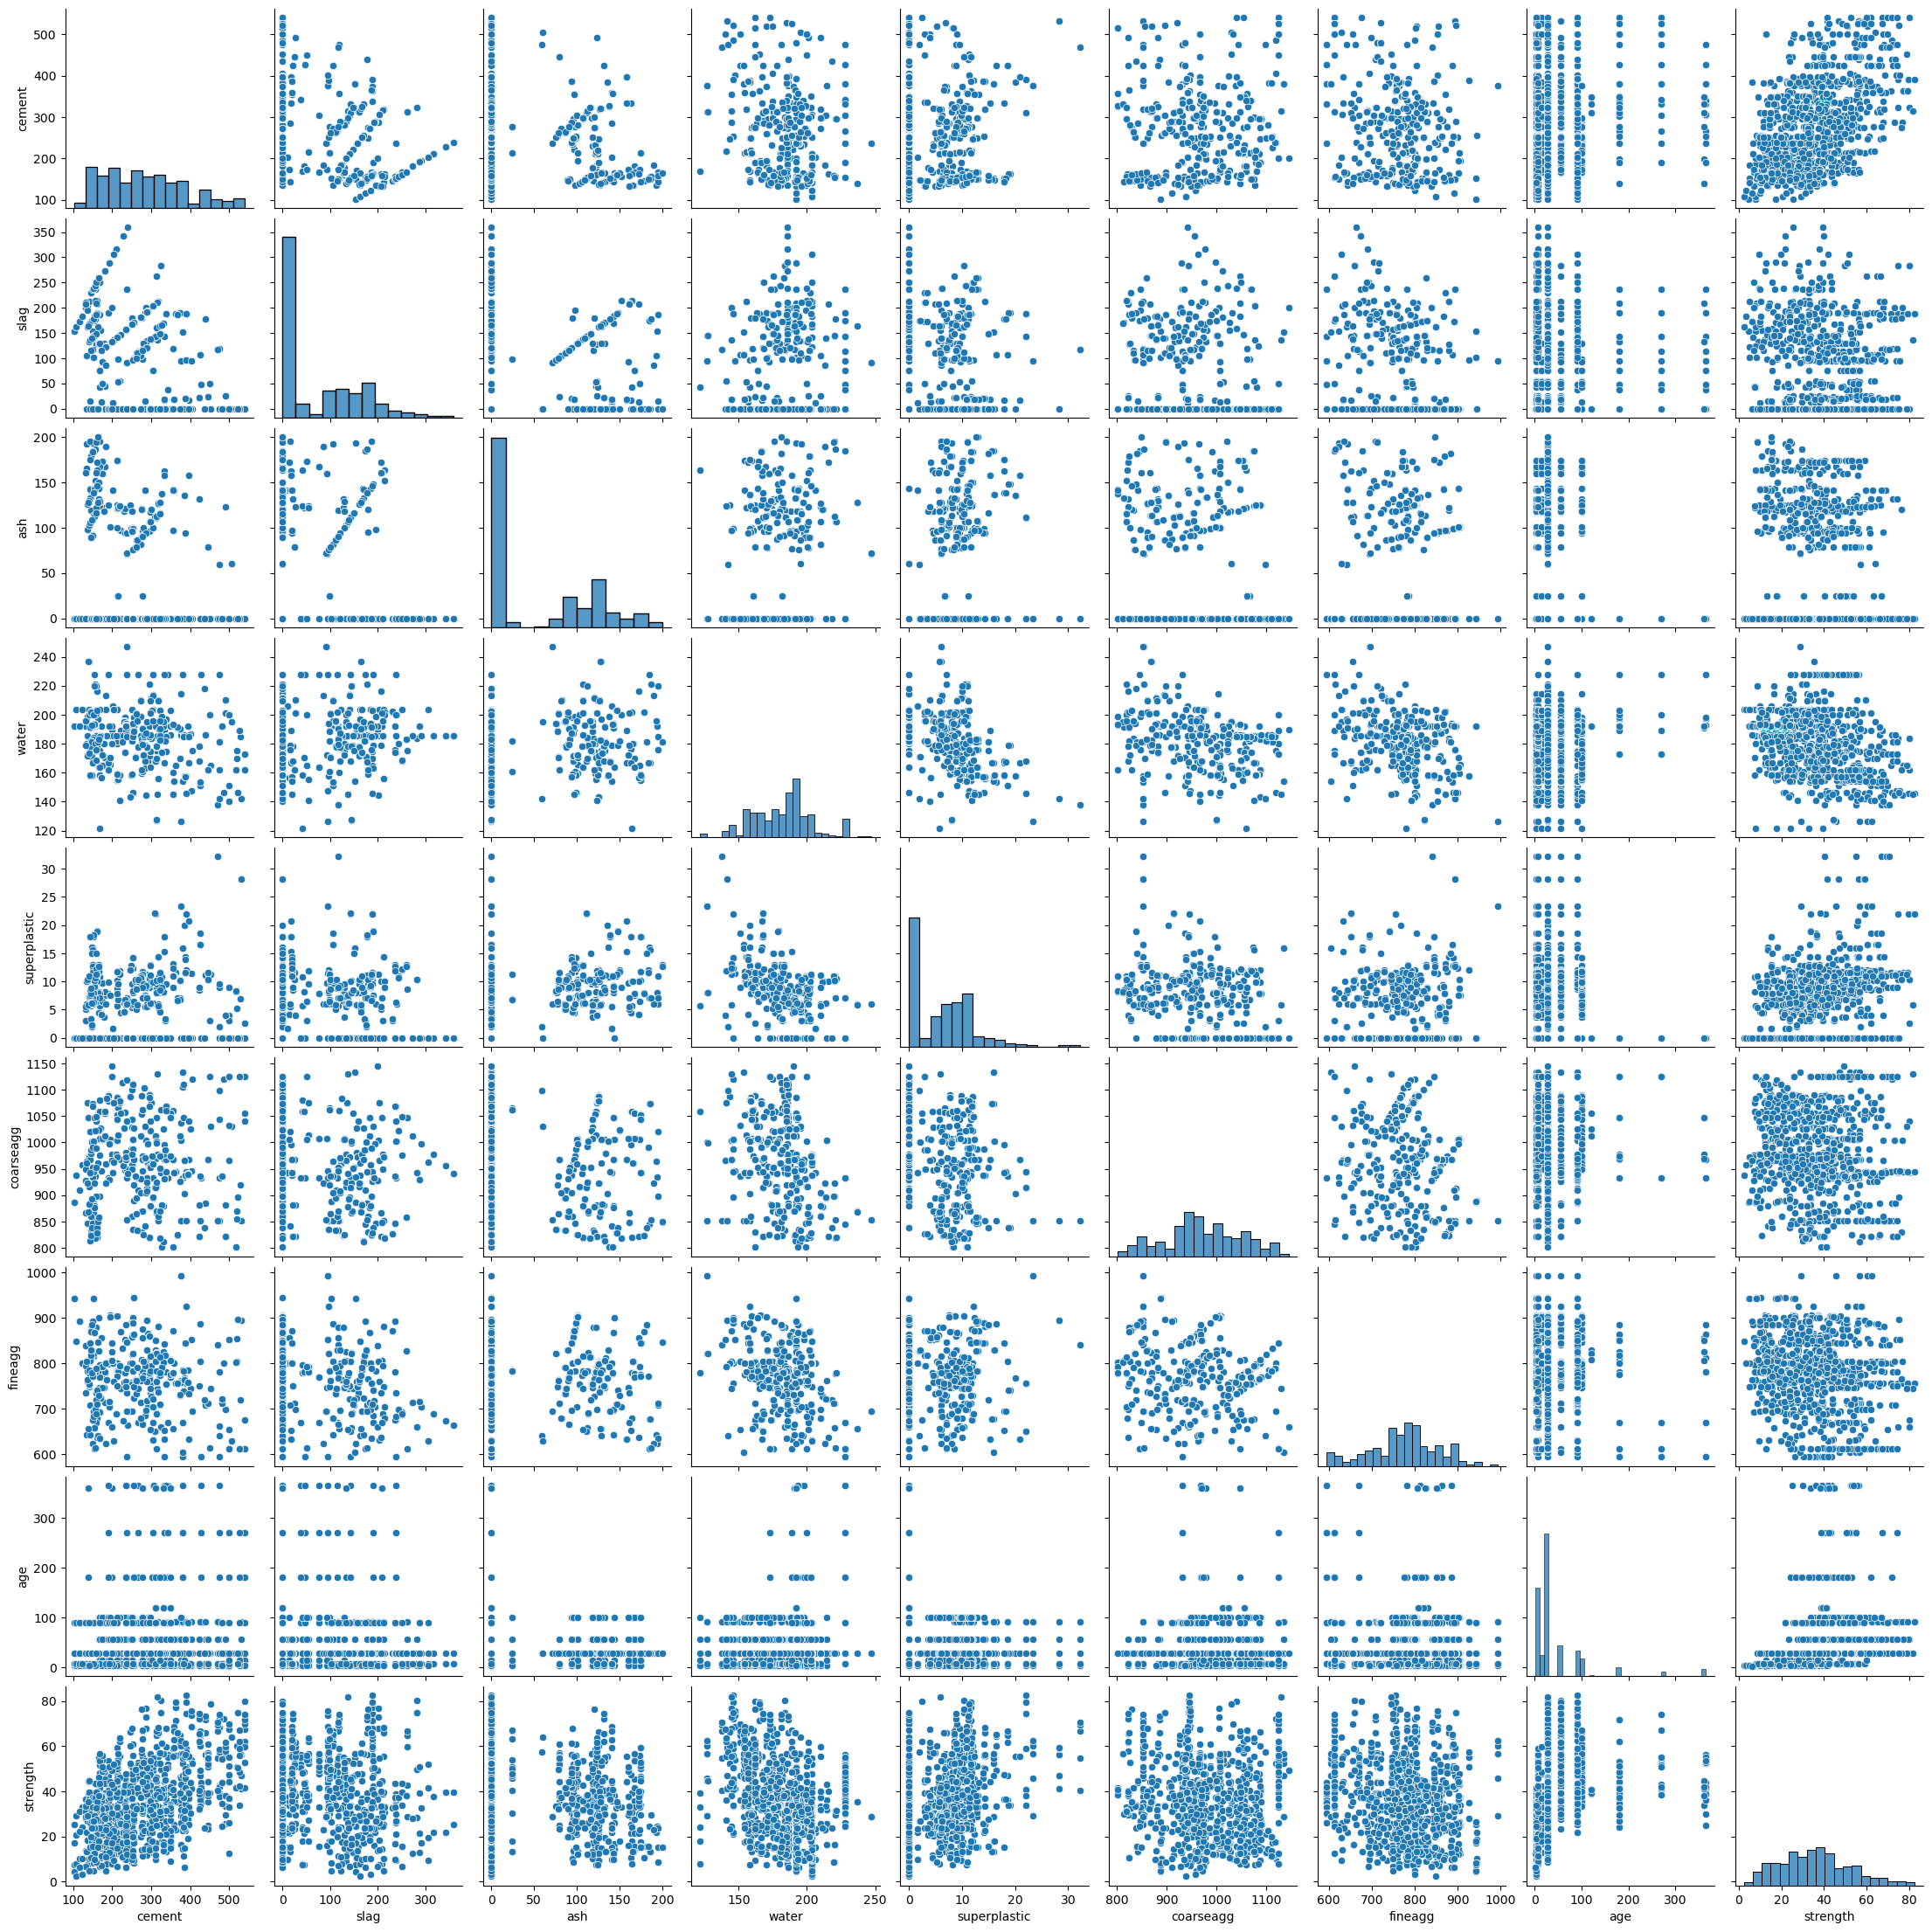

In [8]:
sns.pairplot(data)
plt.show()

## Insights from pairplot

- Cement exhibits a complete lack of correlation with other characteristics, including slag, ash, water, superplastic, coarse aggregate, fine aggregate, and age.
- Slag also demonstrates no correlation with the following characteristics: ash, water, superplasticizer, coarseagg, fine aggregate, and age.
- Ash, aside from lacking any significant correlation with water, superplasticizer, coarse aggregate, fineagg, or age, does not exhibit substantial correlation with any other independent attributes.
- In terms of water’s relationship with other independent characteristics, a negative linear association is observed with both superplasticizer and fineagg. It does not show a meaningful correlation with any other attributes. It is noteworthy that superplasticizers can reduce water content in concrete by 30% without compromising workability.
- Superplastic demonstrates a negative linear relationship solely with water and does not exhibit a strong correlation with any other variables.
- Coarseagg, like all other attributes, does not display a significant correlation with any other attributes.
- Fineagg, when compared to unrelated variables, exhibits a linear inverse relationship with water and does not show any meaningful correlation with other characteristics.

## Checking correlation for the data

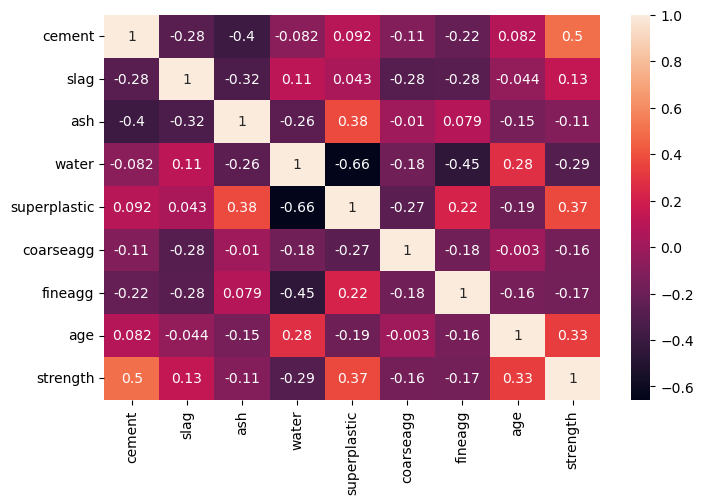

In [9]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(), annot = True)
plt.show()

## Insights from heatmap
- There aren't any high correlations between strength and other features except for cement, which should be the case for more strength.
-  Age and superplastic are the other two features which are correlated with strength.
-  Superplastic seems to have a negative high correlation with water, positive correlations with ash and fineagg.

# Univariate Analysis

[0.0054428  0.01608648 0.01886836 0.02189213 0.0237064  0.01354651
 0.0120951  0.00628945 0.00435424 0.00229807]

[0.04368932 0.12912621 0.15145631 0.17572816 0.19029126 0.10873786
 0.09708738 0.05048544 0.03495146 0.0184466 ]

[ 2.33  10.357 18.384 26.411 34.438 42.465 50.492 58.519 66.546 74.573
 82.6  ]


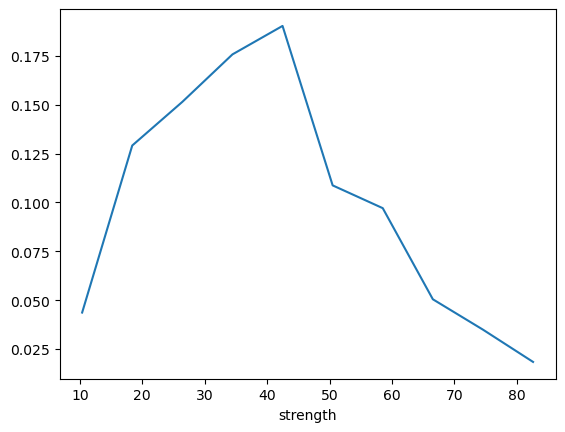

In [10]:
counts, bin_edges = np.histogram(data['strength'],bins = 10, density = True)
print(counts)
print('')
plt.xlabel('strength')
pdf = counts/sum(counts)
print(pdf)
print('')
print(bin_edges)
plt.plot(bin_edges[1:],pdf)
plt.show()

[0.04368932 0.17281553 0.32427184 0.5        0.69029126 0.79902913
 0.8961165  0.94660194 0.9815534  1.        ]


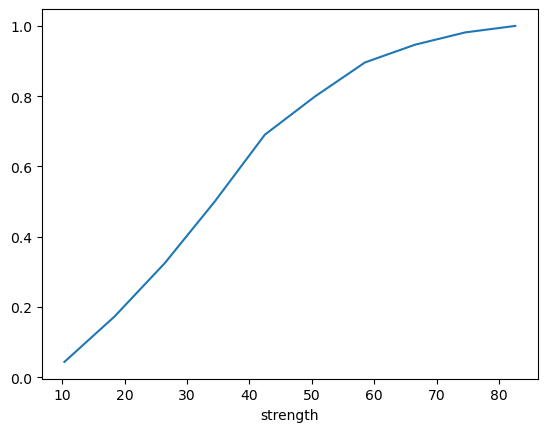

In [11]:
cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('strength')
plt.show()

[0.0054428  0.01608648 0.01886836 0.02189213 0.0237064  0.01354651
 0.0120951  0.00628945 0.00435424 0.00229807]
pdf
[0.04368932 0.12912621 0.15145631 0.17572816 0.19029126 0.10873786
 0.09708738 0.05048544 0.03495146 0.0184466 ]
bin_edges
[ 2.33  10.357 18.384 26.411 34.438 42.465 50.492 58.519 66.546 74.573
 82.6  ]
cdf
[0.04368932 0.17281553 0.32427184 0.5        0.69029126 0.79902913
 0.8961165  0.94660194 0.9815534  1.        ]


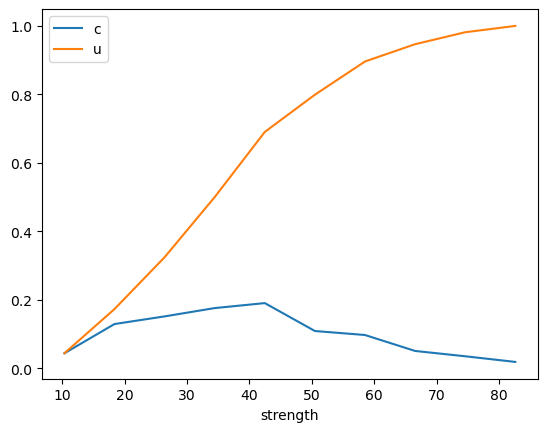

In [12]:
counts, bin_edges = np.histogram(data['strength'],bins = 10, density = True)
print(counts)
print('pdf')
plt.xlabel('strength')
pdf = counts/sum(counts)
print(pdf)
print('bin_edges')
print(bin_edges)
cdf = np.cumsum(pdf)
print('cdf')
print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend('cumulative distributon function')
plt.show()

#### - If we draw a straight line from 'strength' value at 70, then it intersects the curve
#### - Cumulative distribution function (yellow) at value approximately equal to 0.8 i.e., there are 80% of strength from cumulative sum of 30 to 70

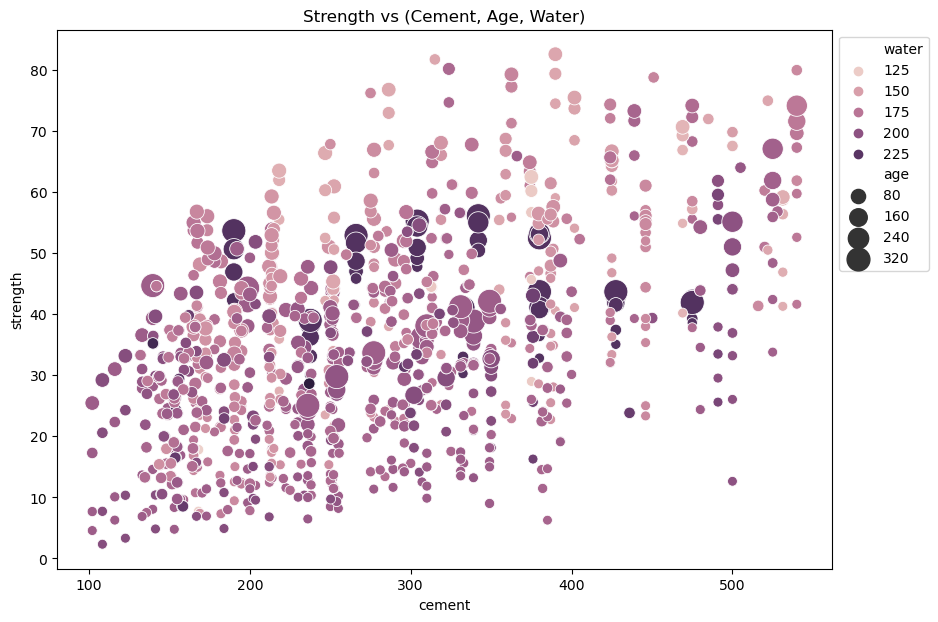

In [13]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.scatterplot(y='strength', x = 'cement', hue = 'water', size='age', data=data,ax = ax, sizes = (50,300))
ax.set_title('Strength vs (Cement, Age, Water)')
ax.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.show()

## Insights from Strength vs (Cement, Age, Water)
1. Strength increases with the amount of cement.
2. Compressive strength increases with age.
3. Cement with low age requires more cement for higher strength
4. The older the cement is, the more water it requires.
5. Concrete strength increases when less water is used in preparing it.

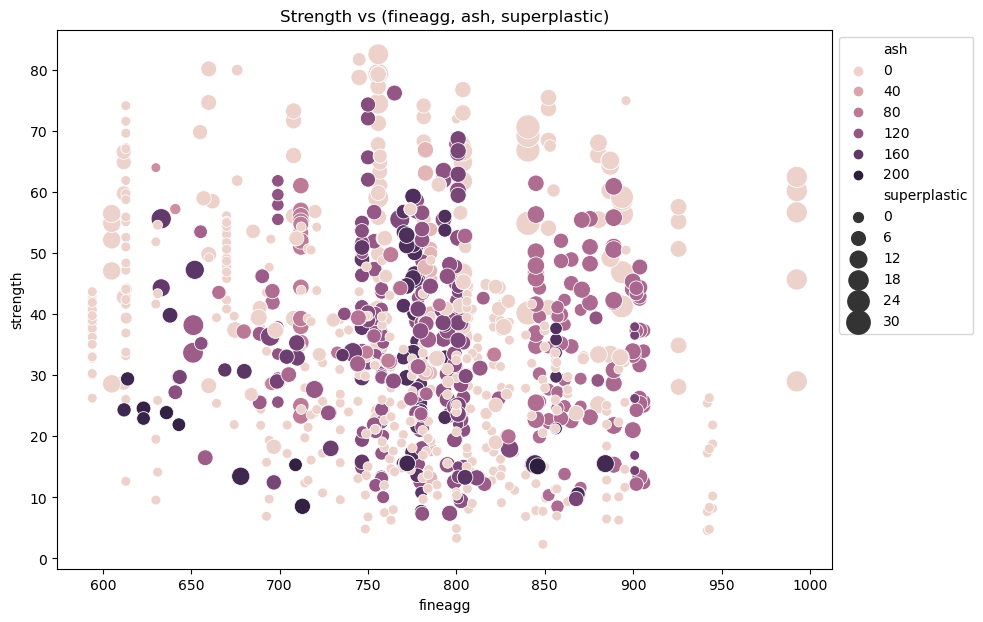

In [14]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.scatterplot(y='strength', x = 'fineagg', hue = 'ash', size='superplastic', data=data,ax = ax, sizes = (50,300))
ax.set_title('Strength vs (fineagg, ash, superplastic)')
ax.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.show()

## Insights from Strength vs (fineagg, ash, superplastic)
1. As ash increases the strength decreases
2. Strength increases with the superplastic

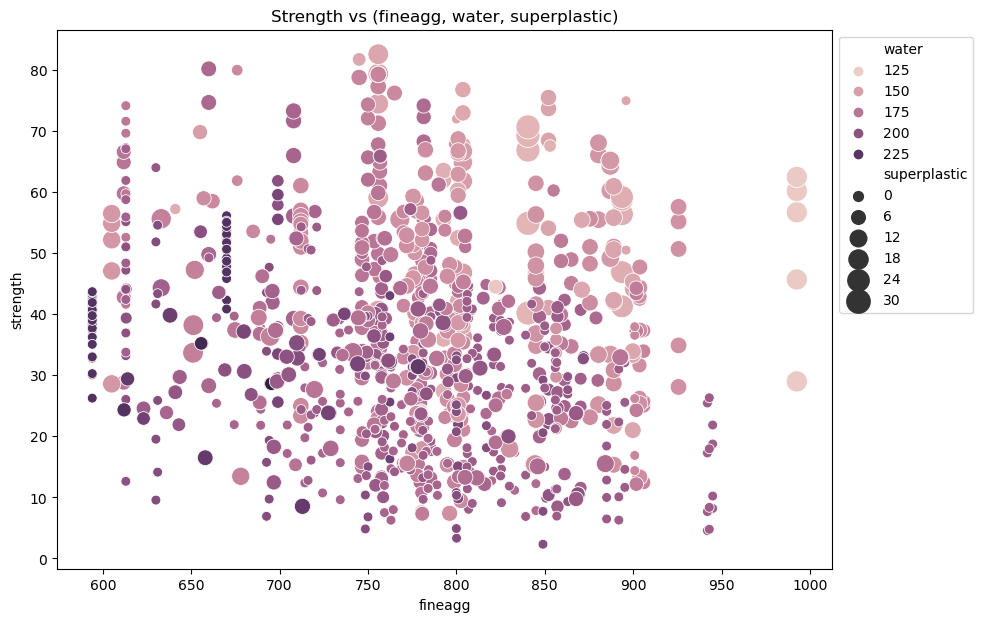

In [15]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.scatterplot(y='strength', x = 'fineagg', hue = 'water', size='superplastic', data=data,ax = ax, sizes = (50,300))
ax.set_title('Strength vs (fineagg, water, superplastic)')
ax.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.show()

## Insights from Strength vs (fineagg, water, superplastic)
1. Strength decreases with an increase in water and strength increases in superplastic.
2. More fineagg is used when less water, and more superplastic is used.

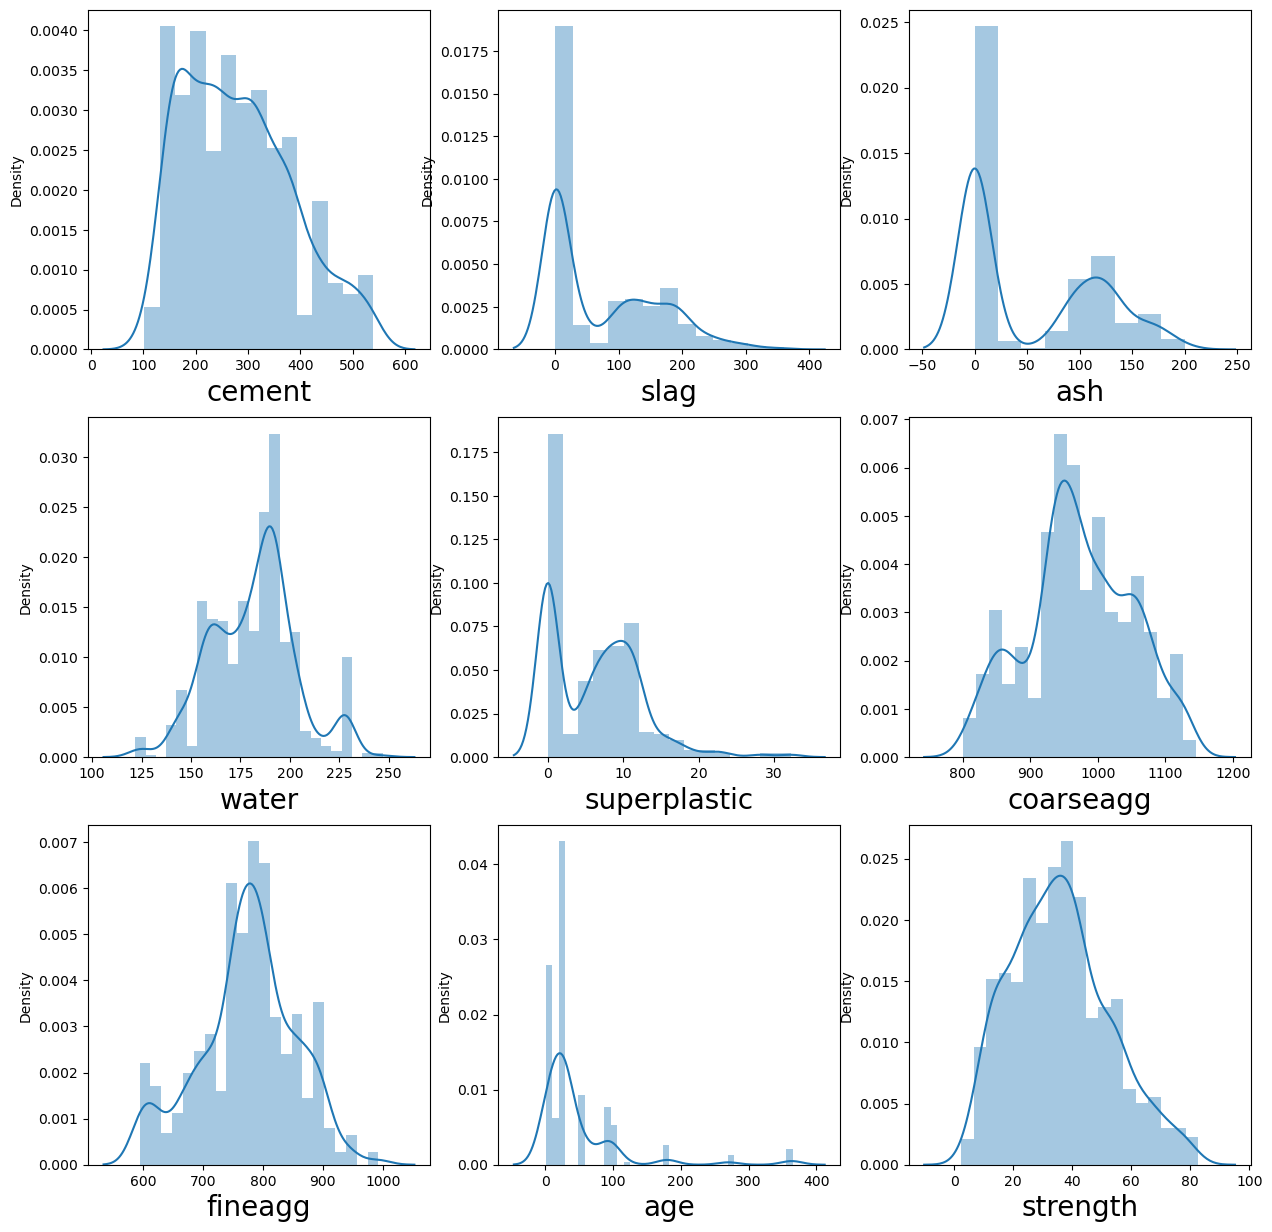

In [16]:
# Let's see how data is distributed for every column
plt.figure(figsize=(15,15), facecolor = 'white')

plotnumber = 1 

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show()

## Insights from distribution plot
- cement exhibits a distribution that closely resembles a normal distribution.
- blast-furnace slag (abbreviated as 'slag') displays a proper skewness and appears to follow a distribution with three peaks (Gaussians).
- ash is right-skewed and appears to have a bimodal distribution with two peaks (Gaussian).
- water’s distribution shows three peaks with a leftward tilt.
- superplastic demonstrates a distribution with two peaks and proper skewness.
- coarse aggregate’s (abbreviated as 'coarseagg') distribution is close to normal and displays three peaks (Gaussians).
- fine aggregate’s (abbreviated as 'fineagg') distribution appears to be bimodal with two peaks, indicating a non-normal distribution.
-  The age feature appears to have multiple peaks and a skewed distribution, which may be appropriate for the 
dataset.

## Data Preprocessing

In [17]:
# Splitting the input dataset in X and the output dataset into y
X = data.drop(columns = ['strength'])
y = data['strength']

In [18]:
# Splitting the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [19]:
# Scaling the data
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [20]:
x_train

array([[ 1.11761683,  0.25157726, -0.83799711, ..., -0.34950569,
         0.99444596, -0.28564741],
       [-0.64932353, -0.22015075,  1.07581133, ...,  0.51759393,
         0.10669416, -0.49678526],
       [ 1.53548074, -0.56385477,  0.40228891, ..., -0.0900181 ,
        -0.74505093, -0.60235418],
       ...,
       [ 0.06444853, -0.84066338,  0.67232587, ..., -0.16452444,
         1.15461377, -0.66267928],
       [ 0.9776986 , -0.60998954,  0.63778626, ..., -0.46254978,
         0.90629159, -0.60235418],
       [ 0.71298844, -0.62152323,  1.37567795, ..., -0.4111661 ,
         0.35998278, -0.60235418]])

In [21]:
x_test

array([[-0.84029301, -0.84066338,  0.73983511, ...,  0.30820543,
         1.61152659,  0.1366283 ],
       [-1.22884971,  0.82249501,  0.92509302, ..., -0.6526694 ,
        -1.41676244, -0.28564741],
       [-0.29858256, -0.84066338, -0.83799711, ...,  1.75979441,
         0.14890893, -0.28564741],
       ...,
       [-0.67673994,  0.78904731, -0.83799711, ..., -0.00780421,
        -0.27323878, -0.66267928],
       [-0.94145011,  0.15123414,  2.14496928, ..., -0.65523859,
        -1.85008465, -0.28564741],
       [ 1.33694811,  0.38536808, -0.83799711, ..., -1.56601433,
         1.42900978,  0.66447293]])

## Model Building

## Linear Regression
There are three types of Linear Regression:
1. Linear regression - No regularisation
2. Lasso Regression - L1 regularisation (tries to push coefficients to zero)
3. Ridge Regression - L2 regularisation (tries to keep coefficients as low as possible)
#### We will compare these algorithms

In [22]:
lr = LinearRegression() # Linear Regression

lasso = Lasso() # Lasso Regression

ridge = Ridge() # Ridge Regression

In [23]:
lr.fit(x_train, y_train) # fitting the linear regression model

LinearRegression()

In [24]:
lasso.fit(x_train, y_train) # fitting lasso regression model

Lasso()

In [25]:
ridge.fit(x_train, y_train) # fitting ridge regression model

Ridge()

## Making predictions on Test data

In [26]:
y_pred_lr = lr.predict(x_test)

In [27]:
y_pred_lasso = lasso.predict(x_test)

In [28]:
y_pred_ridge = ridge.predict(x_test)

## Evaluation
### Comparing the Root Mean Squared Error (RMSE), Mean Squared Error(MSE), Mean Absolute Error(MAE) and R2 score.

### Linear Regression results

In [29]:
print("Model\t\t\t RMSE \t\t MSE \t\t MAE\t\t R2")
print("""Linear Regression\t {:.2f}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}""".format(
    np.sqrt(mean_squared_error(y_test, y_pred_lr)), mean_squared_error(y_test, y_pred_lr),
    mean_absolute_error(y_test,y_pred_lr), r2_score(y_test, y_pred_lr)))

Model			 RMSE 		 MSE 		 MAE		 R2
Linear Regression	 10.28		 105.76		 8.23		 0.57


### Lasso Regression results

In [30]:
print("Model\t\t\t RMSE\t\t MSE\t\t MAE\t\t R2")
print("""Lasso Regression\t {:.2f}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}""".format(
    np.sqrt(mean_squared_error(y_test, y_pred_lasso)), mean_squared_error(y_test, y_pred_lasso), 
    mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))

Model			 RMSE		 MSE		 MAE		 R2
Lasso Regression	 10.68		 114.11		 8.65		 0.54


### Ridge Regression results

In [31]:
print("Model\t\t\t RMSE\t\t MSE\t\t MAE\t\t R2")
print("""Ridge Regression\t {:.2f}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}""".format(
    np.sqrt(mean_squared_error(y_test, y_pred_ridge)), mean_squared_error(y_test, y_pred_ridge), 
    mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))

Model			 RMSE		 MSE		 MAE		 R2
Ridge Regression	 10.29		 105.84		 8.24		 0.57


#### The performance seems to be similar with all three methods.

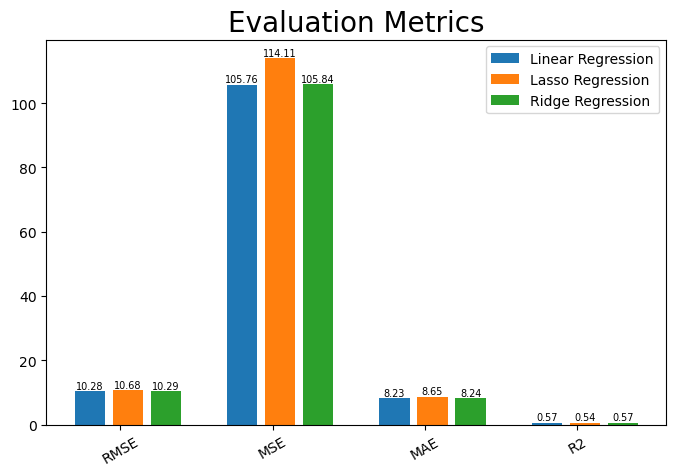

In [55]:
Linear = [10.28, 105.76, 8.23, 0.57]
Lasso = [10.68, 114.11, 8.65, 0.54]
Ridge = [10.29, 105.84, 8.24, 0.57]

plt.figure(figsize=(8,5))
width = 0.2
x = ["RMSE", "MSE", "MAE", "R2"]
xpos = np.arange(len(x))

plt.bar( xpos, Linear, width, label="Linear Regression")
plt.bar( xpos+0.25,  Lasso, width, label="Lasso Regression")
plt.bar( xpos+0.5, Ridge, width, label="Ridge Regression")

# Add values on top of each bar
for i, value in enumerate(Linear):
    plt.text(xpos[i], value + 0.05, f"{value:.2f}", ha='center', va='bottom', fontsize=7)
for i, value in enumerate(Lasso):
    plt.text(xpos[i] + 0.25, value + 0.05, f"{value:.2f}", ha='center', va='bottom', fontsize=7)
for i, value in enumerate(Ridge):
    plt.text(xpos[i] + 0.5, value + 0.05, f"{value:.2f}", ha='center', va='bottom', fontsize=7)

plt.xticks(xpos+0.2,x, rotation=30)
plt.title("Evaluation Metrics", fontsize=20)

plt.legend()
plt.show()

#### The evaluation metrics of the 3 regression models is shown in bar graph above.

## Plotting Predictions

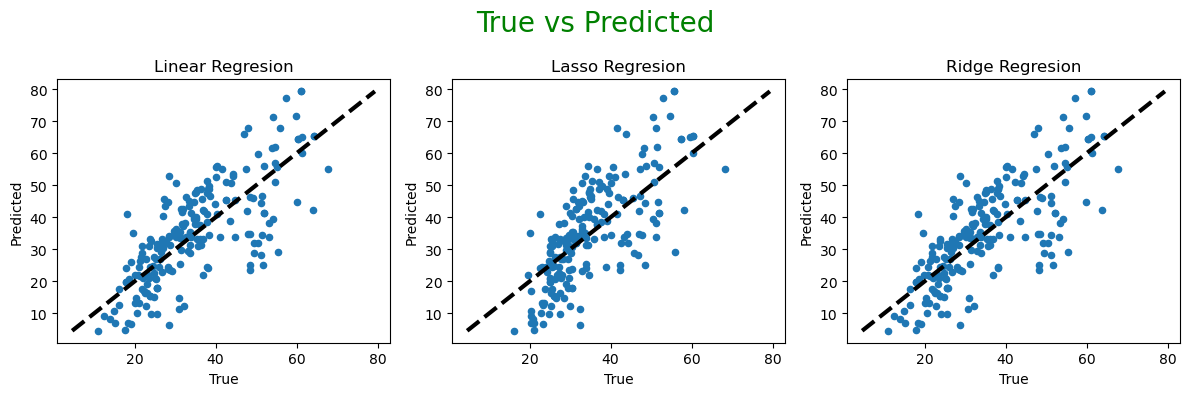

In [63]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))

ax1.scatter(y_pred_lr, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax1.set_xlabel('True')
ax1.set_ylabel('Predicted')
ax1.set_title('Linear Regresion')

ax2.scatter(y_pred_lasso, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax2.set_xlabel('True')
ax2.set_ylabel('Predicted')
ax2.set_title('Lasso Regresion')

ax3.scatter(y_pred_ridge, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax3.set_xlabel('True')
ax3.set_ylabel('Predicted')
ax3.set_title('Ridge Regresion')

fig.suptitle('True vs Predicted', fontsize=20, color='green')
fig.tight_layout()

#### Looking at the graphs between predicted and true values of the target variable, we can conclude that Linear and Ridge Regression perform well as the predictions are closer to the actual values.

#### While Lasso Regression reduces the complexity at the cost of losing performance in this case. The closer the points are to the black line, the less error is.